In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('Ecommerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [4]:
df.shape

(2500, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


In [7]:
df.describe()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1249.50000,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,721.83216,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,0.00000,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,624.75000,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,1249.50000,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,1874.25000,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,2499.00000,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


In [8]:
df.set_index('ID', inplace=True)

In [9]:
df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
ID,,,,,,
1476,130,65,213.905831,31.600751,233,235
1535,543,46,639.223004,5.689175,228,170
1807,520,102,1157.402763,844.321606,247,409
1727,702,83,1195.903634,850.041757,148,200
1324,221,84,180.754616,64.283300,243,259


In [11]:
df.index.name = None
df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
1476,130,65,213.905831,31.600751,233,235
1535,543,46,639.223004,5.689175,228,170
1807,520,102,1157.402763,844.321606,247,409
1727,702,83,1195.903634,850.041757,148,200
1324,221,84,180.754616,64.283300,243,259


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df)
X


array([[0.06688963, 0.22088353, 0.03257084, 0.01301296, 0.45330739,
        0.4017094 ],
       [0.41220736, 0.14457831, 0.0973327 , 0.00234276, 0.44357977,
        0.29059829],
       [0.39297659, 0.36947791, 0.17623449, 0.34768545, 0.48054475,
        0.6991453 ],
       ...,
       [0.27173913, 0.40562249, 0.        , 0.        , 0.16342412,
        0.77606838],
       [0.18478261, 0.08835341, 0.48580837, 0.03217462, 0.21595331,
        0.36752137],
       [0.63879599, 0.45381526, 0.21235018, 0.43873046, 0.48249027,
        0.25470085]])

In [19]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X, method='ward')
Z

array([[1.16000000e+03, 1.17700000e+03, 2.66955703e-02, 2.00000000e+00],
       [1.49000000e+02, 4.67000000e+02, 2.75989561e-02, 2.00000000e+00],
       [2.61000000e+02, 2.05300000e+03, 3.09206445e-02, 2.00000000e+00],
       ...,
       [4.99100000e+03, 4.99500000e+03, 6.79908800e+00, 1.17600000e+03],
       [4.99300000e+03, 4.99600000e+03, 1.17124842e+01, 1.78600000e+03],
       [4.99400000e+03, 4.99700000e+03, 1.51323508e+01, 2.50000000e+03]])

In [18]:
Z.shape

(2499, 4)

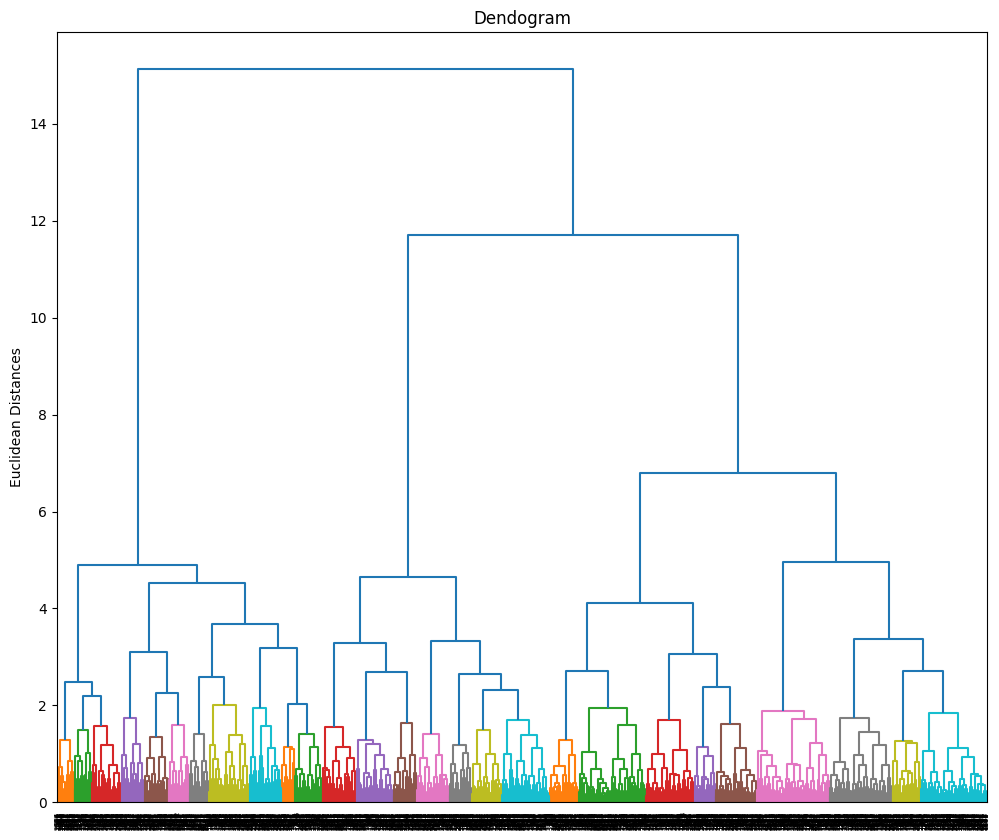

In [20]:
plt.figure(figsize=(12,10))
hierarchy.dendrogram(Z, color_threshold=2)
plt.title('Dendogram')
plt.ylabel('Euclidean Distances')
plt.show()

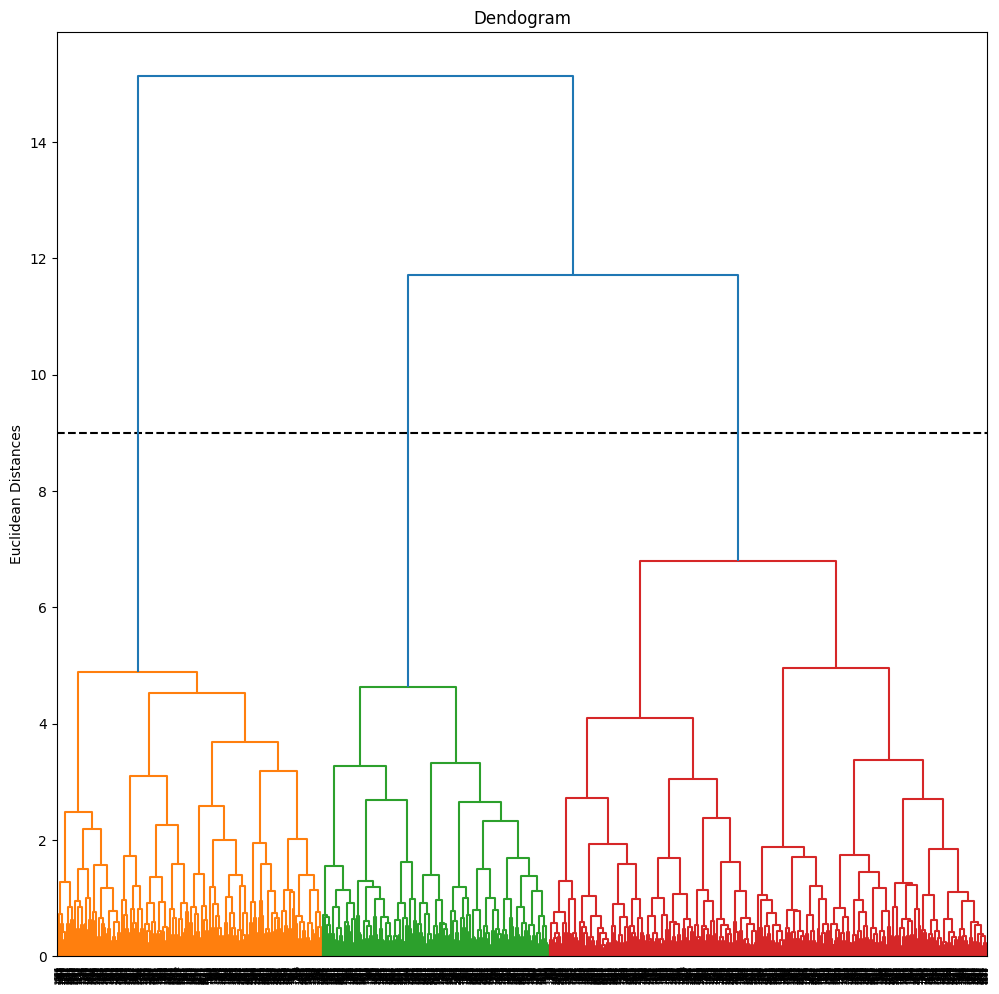

In [23]:
fig,ax = plt.subplots(figsize=(12,12))
plt.axhline(y=9, color='k', linestyle='--')
hierarchy.dendrogram(Z)
plt.title('Dendogram')
plt.ylabel('Euclidean Distances')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean',linkage='ward')
labels = agg_cluster.fit_predict(X)

In [26]:
from sklearn.metrics import silhouette_score
print(f'Silhoutte Score : {silhouette_score(X,labels)}')

Silhoutte Score : 0.2488052769752961


In [27]:
labels

array([0, 0, 1, ..., 0, 2, 1])

In [28]:
np.unique(labels)


array([0, 1, 2])

In [29]:
for clusters in range(2,9):
    clustering = AgglomerativeClustering(n_clusters=clusters, metric='euclidean', linkage='ward' )
    prediction = clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, prediction)
    print(f'For n_clusters = {clusters}, average silhouette_score is:  {silhouette_avg}')

For n_clusters = 2, average silhouette_score is:  0.2685032221094717
For n_clusters = 3, average silhouette_score is:  0.2488052769752961
For n_clusters = 4, average silhouette_score is:  0.1749415575602788
For n_clusters = 5, average silhouette_score is:  0.14500336265864977
For n_clusters = 6, average silhouette_score is:  0.12797228747162057
For n_clusters = 7, average silhouette_score is:  0.11289044480503795
For n_clusters = 8, average silhouette_score is:  0.11834769274786866


In [30]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(X)

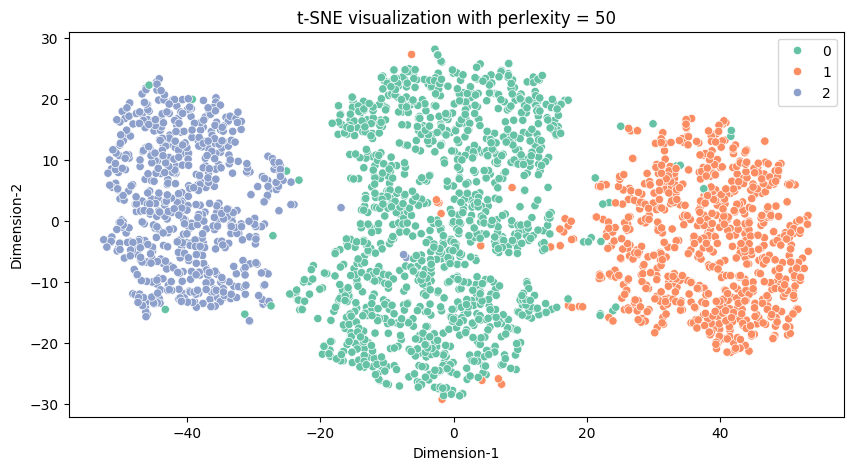

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = tsne_data[:, 0], y=tsne_data[:, 1], hue=labels, palette='Set2')
plt.xlabel('Dimension-1')
plt.ylabel('Dimension-2')
plt.title('t-SNE visualization with perlexity = 50')
plt.show()

In [33]:
data = pd.DataFrame(X, columns=df.columns, index = df.index)
data.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
1476,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709
1535,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598
1807,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145
1727,0.545151,0.293173,0.182097,0.350041,0.287938,0.341880
1324,0.142977,0.297189,0.027523,0.026471,0.472763,0.442735


In [34]:
data['label'] = pd.Series(labels, index=data.index)

In [35]:
data.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,label
1476,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,0
1535,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,0
1807,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,1
1727,0.545151,0.293173,0.182097,0.350041,0.287938,0.341880,1
1324,0.142977,0.297189,0.027523,0.026471,0.472763,0.442735,0


In [36]:
clustered_df = data.groupby('label').mean()

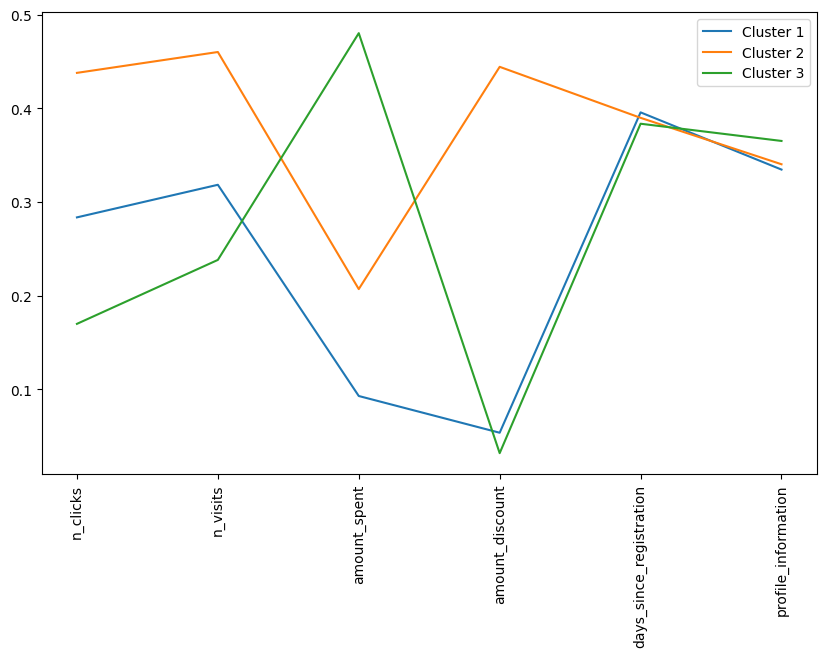

In [37]:
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

plt.figure(figsize=(10,6))
plt.plot(clustered_df.T, label = labels)
plt.xticks(rotation=90)
plt.legend(labels)
plt.show()